# Example: North American pumpkin prices

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Visualize and clean data in preparation for ML

**Analyze the data**

In [2]:
pumpkins = pd.read_csv('data/US-pumpkins.csv')
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [3]:
pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   City Name        1757 non-null   object 
 1   Type             45 non-null     object 
 2   Package          1757 non-null   object 
 3   Variety          1752 non-null   object 
 4   Sub Variety      296 non-null    object 
 5   Grade            0 non-null      float64
 6   Date             1757 non-null   object 
 7   Low Price        1757 non-null   float64
 8   High Price       1757 non-null   float64
 9   Mostly Low       1654 non-null   float64
 10  Mostly High      1654 non-null   float64
 11  Origin           1754 non-null   object 
 12  Origin District  131 non-null    object 
 13  Item Size        1478 non-null   object 
 14  Color            1141 non-null   object 
 15  Environment      0 non-null      float64
 16  Unit of Sale     162 non-null    object 
 17  Quality       

In [4]:
pumpkins["Date"] = pd.to_datetime(pumpkins["Date"])

In [5]:
pumpkins["Month"] = pumpkins["Date"].dt.month

In [6]:
pumpkins.isnull().sum()

City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
Month                 0
dtype: int64

In [7]:
new_columns = ['Package', 'Month', 'Low Price', 'High Price']
pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)
pumpkins.head()

,Package,Low Price,High Price,Month
0,24 inch bins,270.0,280.0,4
1,24 inch bins,270.0,280.0,5
2,24 inch bins,160.0,160.0,9
3,24 inch bins,160.0,160.0,9
4,24 inch bins,90.0,100.0,11


In [8]:
pumpkins['Price'] = (pumpkins['Low Price'] + pumpkins['High Price']) / 2
pumpkins.head()

,Package,Low Price,High Price,Month,Price
0,24 inch bins,270.0,280.0,4,275.0
1,24 inch bins,270.0,280.0,5,275.0
2,24 inch bins,160.0,160.0,9,160.0
3,24 inch bins,160.0,160.0,9,160.0
4,24 inch bins,90.0,100.0,11,95.0


In [9]:
pumpkins["Package"].unique()

array(['24 inch bins', '36 inch bins', '50 lb sacks',
       '1 1/9 bushel cartons', '1/2 bushel cartons',
       '1 1/9 bushel crates', 'bushel cartons', 'bins', '35 lb cartons',
       'each', '20 lb cartons', '50 lb cartons', '40 lb cartons',
       'bushel baskets', '22 lb cartons'], dtype=object)

In [10]:
new_pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

In [11]:
new_pumpkins.shape

(415, 5)

In [12]:
new_pumpkins["Package"].unique()

array(['1 1/9 bushel cartons', '1/2 bushel cartons',
       '1 1/9 bushel crates', 'bushel cartons', 'bushel baskets'],
      dtype=object)

In [13]:
new_pumpkins.head()

,Package,Low Price,High Price,Month,Price
70,1 1/9 bushel cartons,15.0,15.0,9,15.0
71,1 1/9 bushel cartons,18.0,18.0,9,18.0
72,1 1/9 bushel cartons,18.0,18.0,10,18.0
73,1 1/9 bushel cartons,17.0,17.0,10,17.0
74,1 1/9 bushel cartons,15.0,15.0,10,15.0


In [14]:
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = new_pumpkins['Price']/(1 + 1/9)
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = new_pumpkins['Price']/(1/2)

In [15]:
new_pumpkins.head()

,Package,Low Price,High Price,Month,Price
70,1 1/9 bushel cartons,15.0,15.0,9,13.5
71,1 1/9 bushel cartons,18.0,18.0,9,16.2
72,1 1/9 bushel cartons,18.0,18.0,10,16.2
73,1 1/9 bushel cartons,17.0,17.0,10,15.3
74,1 1/9 bushel cartons,15.0,15.0,10,13.5


**Visualization Strategies**

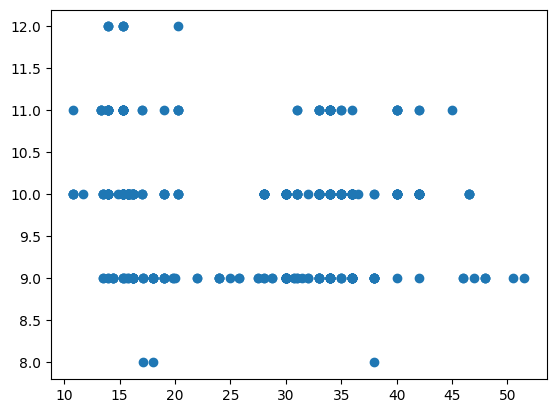

In [16]:
plt.scatter(new_pumpkins["Price"], new_pumpkins["Month"])
plt.show()

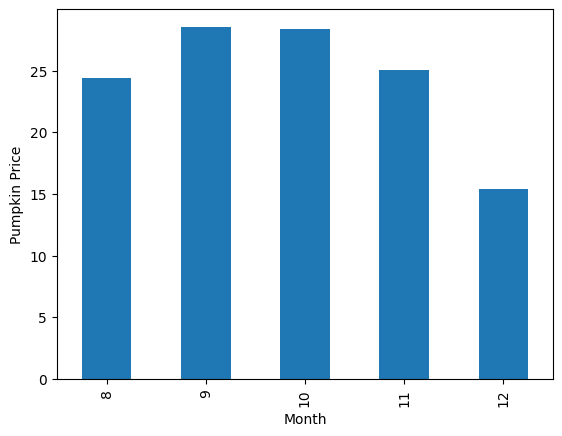

In [17]:
new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.ylabel("Pumpkin Price")
plt.show()

## Build a regression model using Scikit-learn

In [18]:
from datetime import datetime

In [19]:
pumpkins = pd.read_csv('data/US-pumpkins.csv')

In [20]:
# Only get pumpkins priced by the bushel
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

new_columns = ['Package', 'Variety', 'City Name', 'Month', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)

# Calculate the price to be an average of high and low prices
price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2

# Convert the date to a month
month = pd.DatetimeIndex(pumpkins['Date']).month
day_of_year = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)

new_pumpkins = pd.DataFrame(
    {'Month': month, 
     'DayOfYear' : day_of_year, 
     'Variety': pumpkins['Variety'], 
     'City': pumpkins['City Name'], 
     'Package': pumpkins['Package'], 
     'Low Price': pumpkins['Low Price'],
     'High Price': pumpkins['High Price'], 
     'Price': price})

# Convert the price to reflect the pricing by bushel quantity
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/1.1
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price*2

new_pumpkins.head()

,Month,DayOfYear,Variety,City,Package,Low Price,High Price,Price
70,9,267,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,13.636364
71,9,267,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,16.363636
72,10,274,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,16.363636
73,10,274,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,17.0,17.0,15.454545
74,10,281,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,13.636364


**Looking for Correlation**

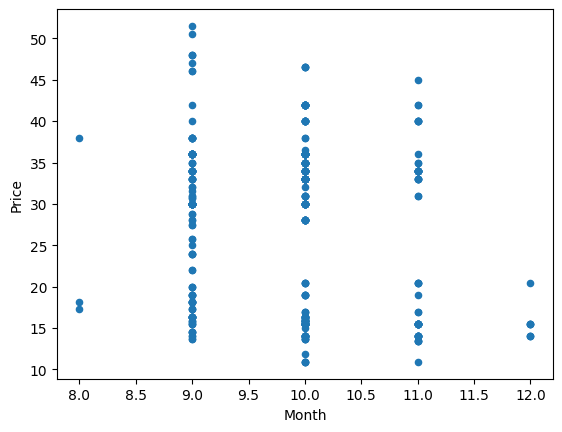

In [21]:
new_pumpkins.plot.scatter('Month','Price')
plt.show()

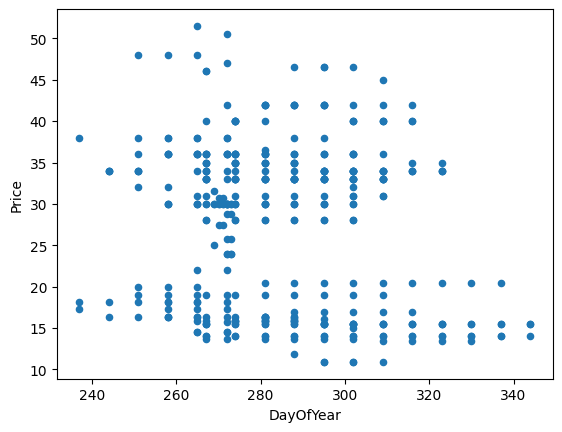

In [22]:
new_pumpkins.plot.scatter('DayOfYear','Price')
plt.show()

In [23]:
print(new_pumpkins['Month'].corr(new_pumpkins['Price']))
print(new_pumpkins['DayOfYear'].corr(new_pumpkins['Price']))

-0.1487829355407754
-0.16673322492745407


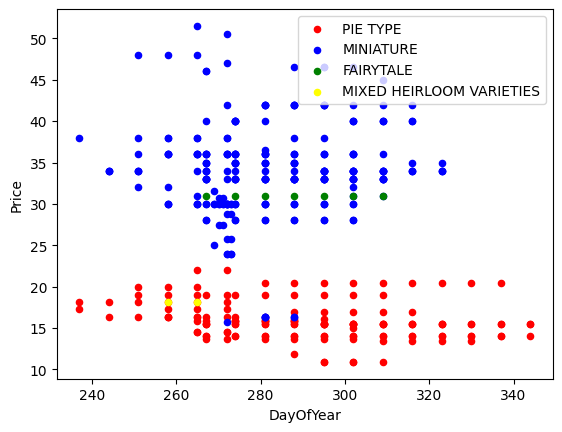

In [24]:
ax=None
colors = ['red','blue','green','yellow']
for i,var in enumerate(new_pumpkins['Variety'].unique()):
    ax = new_pumpkins[new_pumpkins['Variety']==var].plot.scatter('DayOfYear','Price',ax=ax,c=colors[i],label=var)

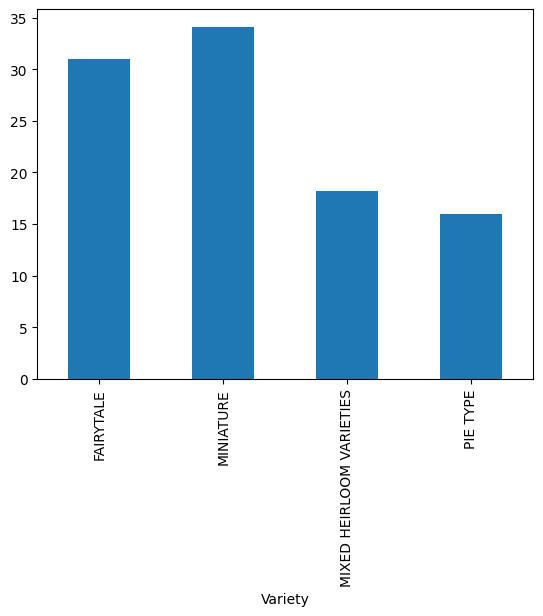

In [25]:
new_pumpkins.groupby('Variety')['Price'].mean().plot(kind='bar')
plt.show()

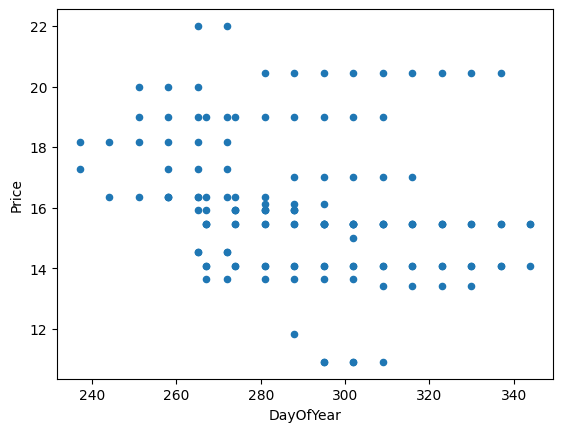

In [26]:
pie_pumpkins = new_pumpkins[new_pumpkins['Variety']=='PIE TYPE'].copy()
pie_pumpkins.plot.scatter('DayOfYear','Price') 
plt.show()

In [27]:
print(pie_pumpkins['DayOfYear'].corr(pie_pumpkins['Price']))

-0.26691922821973163


In [28]:
pie_pumpkins.dropna(inplace=True)
pie_pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 70 to 1630
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       144 non-null    int64  
 1   DayOfYear   144 non-null    int64  
 2   Variety     144 non-null    object 
 3   City        144 non-null    object 
 4   Package     144 non-null    object 
 5   Low Price   144 non-null    float64
 6   High Price  144 non-null    float64
 7   Price       144 non-null    float64
dtypes: float64(3), int64(2), object(3)
memory usage: 10.1+ KB


**Simple Linear Regression**

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [30]:
X = pie_pumpkins['DayOfYear'].to_numpy().reshape(-1,1)
y = pie_pumpkins['Price']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [32]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [34]:
# It means that prices seem to drop a bit with time, but not too much, around 2 cents per day.
lin_reg.coef_

array([-0.01751876])

In [35]:
# it is around 21 in our case, indicating the price at the beginning of the year
lin_reg.intercept_

21.133734359909326

In [36]:
from sklearn.metrics import mean_squared_error

pred = lin_reg.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

Mean error: 2.77 (17.2%)


In [37]:
score = lin_reg.score(X_train,y_train)
print('Model determination: ', score)

Model determination:  0.04460606335028361


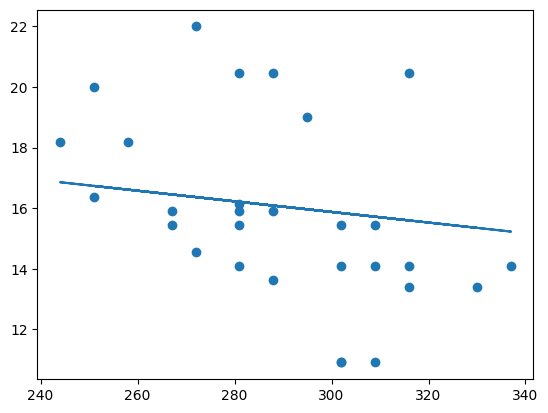

In [38]:
plt.scatter(X_test,y_test)
plt.plot(X_test,pred)
plt.show()

**Polynomial Regression**

In [39]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(PolynomialFeatures(2, include_bias=False), LinearRegression())

pipeline.fit(X_train,y_train)

pred = pipeline.predict(X_test)

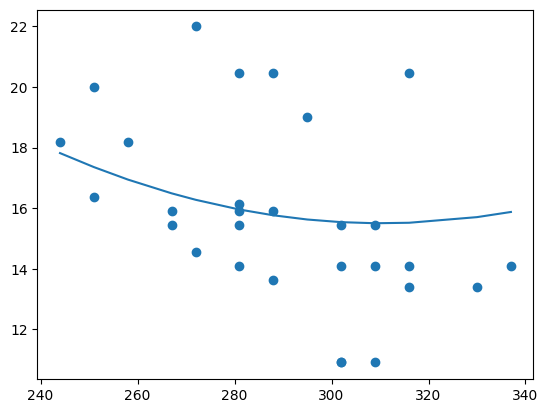

In [40]:
plt.scatter(X_test,y_test)
plt.plot(sorted(X_test),pipeline.predict(sorted(X_test)))
plt.show()

In [41]:
mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

score = pipeline.score(X_train,y_train)
print('Model determination: ', score)

Mean error: 2.73 (17.0%)
Model determination:  0.0763997765528015


**Categorical Features**

In [42]:
pd.get_dummies(new_pumpkins['Variety'])

,FAIRYTALE,MINIATURE,MIXED HEIRLOOM VARIETIES,PIE TYPE
70,0,0,0,1
71,0,0,0,1
72,0,0,0,1
73,0,0,0,1
74,0,0,0,1
...,...,...,...,...
1738,0,1,0,0
1739,0,1,0,0
1740,0,1,0,0
1741,0,1,0,0


**Linear Regression on Variety**

In [43]:
X = pd.get_dummies(new_pumpkins['Variety'])
y = new_pumpkins['Price']

In [44]:
def run_linear_regression(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    lin_reg = LinearRegression()
    lin_reg.fit(X_train,y_train)

    pred = lin_reg.predict(X_test)

    mse = np.sqrt(mean_squared_error(y_test,pred))
    print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

    score = lin_reg.score(X_train,y_train)
    print('Model determination: ', score)

run_linear_regression(X,y)

Mean error: 5.24 (19.7%)
Model determination:  0.774085281105197


In [45]:
X = pd.get_dummies(new_pumpkins['Variety']) \
        .join(new_pumpkins['Month']) \
        .join(pd.get_dummies(new_pumpkins['City'])) \
        .join(pd.get_dummies(new_pumpkins['Package']))

y = new_pumpkins['Price']

run_linear_regression(X,y)

Mean error: 2.84 (10.6%)
Model determination:  0.9400496240889106


**Polynomial Regression**

In [46]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

pipeline.fit(X_train,y_train)

pred = pipeline.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

score = pipeline.score(X_train,y_train)
print('Model determination: ', score)

Mean error: 2.22 (8.25%)
Model determination:  0.9644080393132698


## Logistic regression to predict categories

**Tidy the data**

In [47]:
pumpkins = pd.read_csv('./data/US-pumpkins.csv')

In [49]:
from sklearn.preprocessing import LabelEncoder

new_columns = ['Color','Origin','Item Size','Variety','City Name','Package']
new_pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)
new_pumpkins.dropna(inplace=True)
new_pumpkins = new_pumpkins.apply(LabelEncoder().fit_transform)

new_pumpkins.head()

,City Name,Package,Variety,Origin,Item Size,Color
2,1,3,4,3,3,0
3,1,3,4,17,3,0
4,1,3,4,5,2,0
5,1,3,4,5,2,0
6,1,4,4,5,3,0


In [50]:
new_pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 991 entries, 2 to 1698
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   City Name  991 non-null    int64
 1   Package    991 non-null    int64
 2   Variety    991 non-null    int64
 3   Origin     991 non-null    int64
 4   Item Size  991 non-null    int64
 5   Color      991 non-null    int64
dtypes: int64(6)
memory usage: 54.2 KB


**Visualization - side-by-side grid**

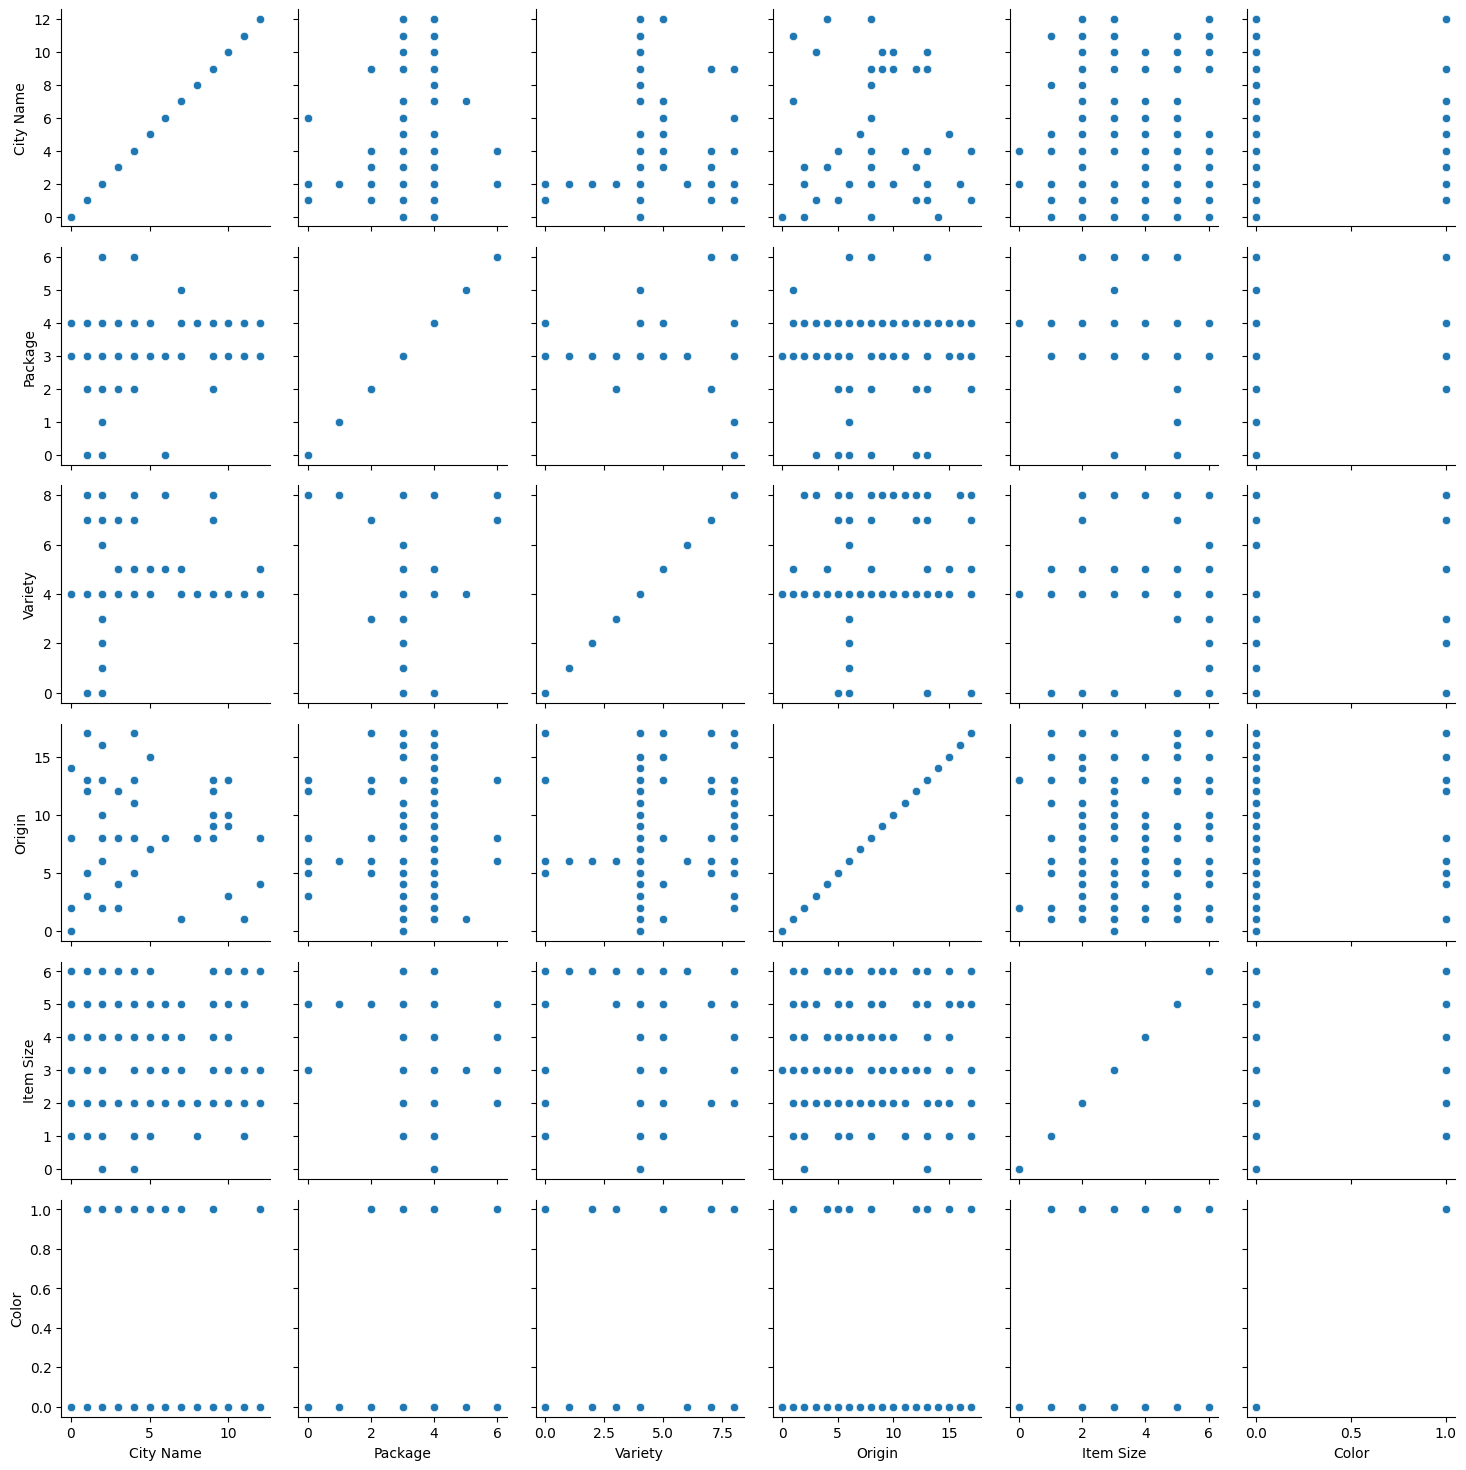

In [51]:
import seaborn as sns

g = sns.PairGrid(new_pumpkins)
g.map(sns.scatterplot)
plt.show()

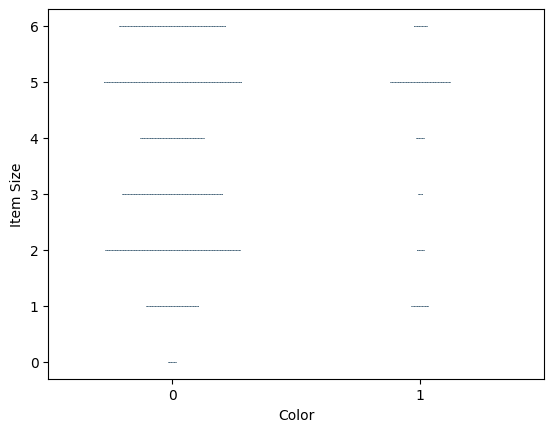

In [52]:
sns.swarmplot(x="Color", y="Item Size", data=new_pumpkins, size=0.5)
plt.show()

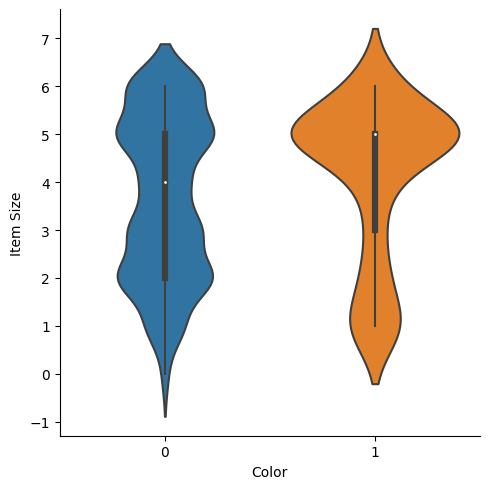

In [53]:
sns.catplot(x="Color", y="Item Size", kind="violin", data=new_pumpkins)
plt.show()

**Build your model**

In [54]:
from sklearn.model_selection import train_test_split

Selected_features = ['Origin','Item Size','Variety','City Name','Package']

X = new_pumpkins[Selected_features]
y = new_pumpkins['Color']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))
print('Predicted labels: ', predictions)
print('Accuracy: ', accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90       166
           1       0.00      0.00      0.00        33

    accuracy                           0.81       199
   macro avg       0.42      0.49      0.45       199
weighted avg       0.69      0.81      0.75       199

Predicted labels:  [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
Accuracy:  0.8140703517587939


In [56]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predictions)

array([[162,   4],
       [ 33,   0]])